In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**DATA PROCESSING**

In [ ]:
# link = "https://www.kaggle.com/datasets/d4rklucif3r/restaurant-reviews"
# df_major = pd.read_csv('/content/Restaurant_Reviews.tsv' , sep='\t')
# df_major


df_major = pd.read_table('/content/Restaurant_Reviews.tsv')
df_major


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df_major.info()
# HERE , 0 = NEGATIVE REVIEW , 1 = POSITIVE 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
# remove all duplicate reviews from the dataframe

df_major = df_major.drop_duplicates(keep = 'last') 
df_major

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
# SOME OF THE EXAMPLES FROM DATAFRAME :
print(df_major['Review'][54])
print(df_major['Liked'][54])
print('\n')
print(df_major['Review'][554])
print(df_major['Liked'][554])


The portion was huge!
1


However, my recent experience at this particular location was not so good.
0


**DATA VISUALISATION**

In [ ]:
df_major['Liked'].value_counts()

1    499
0    497
Name: Liked, dtype: int64

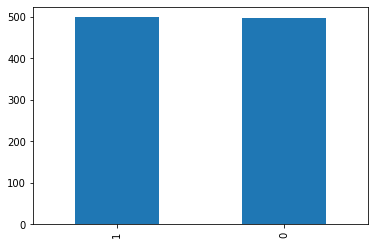

In [ ]:
# USING PANDAS REPRESENTING POSITIVE REVIEW (1) , NEGATIVE REVIEW (0)

df_major['Liked'].value_counts().plot(kind='bar')

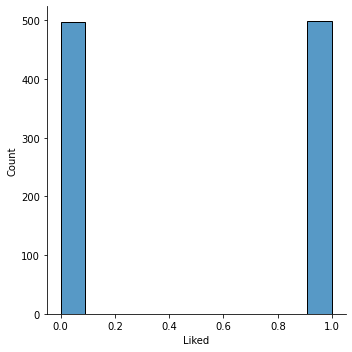

In [ ]:
# USING SEABORN REPRESENTING POSITIVE REVIEW (1) , NEGATIVE REVIEW (0)

sns.displot(df_major['Liked'])
plt.show()

**TRAINING AND TESTING DATAFRAME**

In [ ]:
x = df_major['Review'].values
y = df_major['Liked'].values

In [ ]:
# default ,  TRAIN:TEST :: 75:25

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(747,)
(249,)


**COUNTVECTORISER**

In [ ]:
# IMPORTING and FITTING
# IT IS A FEATURE EXTRACTION TECHNIQUE  

from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test) 

In [ ]:
x_train_vect

<747x1531 sparse matrix of type '<class 'numpy.int64'>'
	with 3646 stored elements in Compressed Sparse Row format>

In [ ]:
# all the text is converted to numerical values

x_train_vect.toarray() 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_test

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1])

**METHOD-1 : SUPPORT VECTOR CLASSIFIER using COUNTVECTORISER**

In [ ]:
# METHOD - 1 : SUPPORT VECTOR CLARIFIER using COUNTVECTORISER (separately)

In [ ]:
# FIITING THE MODEL WITH algorithm i.e., SUPPORT VECTOR CLASSIFIER
from sklearn.svm import SVC 
model_1 = SVC()
model_1.fit(x_train_vect,y_train)

SVC()

In [ ]:
y_pred_1 = model_1.predict(x_test_vect)
y_pred_1

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1])

In [ ]:
# ACCURACY SCORE (SVC using COUNTVECTORISER)

from sklearn.metrics import accuracy_score 
AS_SVC = accuracy_score(y_pred_1,y_test)
print("ACCURACY SCORE of SVC using COUNTVECTORISER = " , AS_SVC )

ACCURACY SCORE of SVC using COUNTVECTORISER =  0.7269076305220884


**METHOD-2 : PIPELINES (SVC + VECTORISATION MODEL)**

In [ ]:
# IMPORTING AND FITTING THE PIPELINE

from sklearn.pipeline import make_pipeline 
model_2 = make_pipeline(CountVectorizer(),SVC())

model_2.fit(x_train,y_train)

y_pred_2 = model_2.predict(x_test)
y_pred_2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [ ]:
# ACCURACY SCORE (PIPELINE = SVC + COUNTVECTORISER)

from sklearn.metrics import accuracy_score 
AS_PL_SVC = accuracy_score(y_pred_2,y_test)
print("ACCURACY SCORE using PIPLINE of SVC & COUNTVECTORISER = ", AS_PL_SVC)

ACCURACY SCORE using PIPLINE of SVC & COUNTVECTORISER =  0.8152610441767069


**METHOD-1 : NAIVE BAYES using COUNTVECTORISER**

In [ ]:
# IMPORTING & FITTING NAIVE BAYES

from sklearn.naive_bayes import MultinomialNB
model_3 = MultinomialNB()

model_3.fit(x_train_vect,y_train)

y_pred_3 = model_3.predict(x_test_vect)
y_pred_3

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [ ]:
# ACCURACY SCORE (NAIVE BAYES using COUNTVECTORISER)

from sklearn.metrics import accuracy_score 
AS_NB = accuracy_score(y_pred_3,y_test)
print("ACCURACY SCORE of NAIVE BAYES using COUNTVECTORISER= " , AS_NB)

ACCURACY SCORE of NAIVE BAYES using COUNTVECTORISER=  0.7469879518072289


**METHOD-2 : PIPELINES (NAIVE BAYES + VECTORISATION MODEL)**

In [ ]:
# IMPORTING & FITTING & GIVING PIPELINE

from sklearn.pipeline import make_pipeline 
model_4 = make_pipeline(CountVectorizer(),MultinomialNB())

model_4.fit(x_train,y_train)

y_pred_4 = model_4.predict(x_test)
y_pred_4

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [ ]:
# ACCURACY SCORE (PIPELINE = NB + COUNTVECTORISER)

from sklearn.metrics import accuracy_score 
AS_PL_NB = accuracy_score(y_pred_4,y_test)
print("ACCURACY SCORE of PIPELINE of NAIVE BAYES & COUNTVECTORISER= " , AS_PL_NB)

ACCURACY SCORE of PIPELINE of NAIVE BAYES & COUNTVECTORISER=  0.7791164658634538


**ACCURATE MODEL**

In [ ]:
AS_LIST = [AS_SVC , AS_PL_SVC , AS_NB , AS_PL_NB]
print(AS_LIST)
print(type(AS_LIST))

[0.7269076305220884, 0.8152610441767069, 0.7469879518072289, 0.7791164658634538]
<class 'list'>


In [ ]:
AS_MAX = max(AS_LIST)
print(AS_MAX)


0.8152610441767069


In [ ]:
# SEARCHING ACCURATE MODEL AND ITS ACCURACY SCORE

if (AS_MAX == AS_SVC):
  model = model_1
  print("ACCURATE MODEL = SVC using COUNTVECTORISER")
  print("accuracy score = " , AS_SVC)


elif (AS_MAX == AS_PL_SVC):
  model = model_2
  print("ACCURATE MODEL = PIPELINE of SVC + COUNTVECTORISER")
  print("accuracy score = " , AS_PL_SVC)


elif (AS_MAX == AS_NB):
  model = model_3
  print("ACCURATE MODEL = NAIVE BAYES using COUNTVECTORISER")
  print("accuracy score = " , AS_NB)


elif (AS_MAX == AS_PL_NB):
  model = model_4
  print("ACCURATE MODEL = PIPELINE of NAIVE BAYES + COUNTVECTORISER")
  print("accuracy score = " , AS_PL_NB)


print("model = " , model)

ACCURATE MODEL = PIPELINE of SVC + COUNTVECTORISER
accuracy score =  0.8152610441767069
model =  Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])


In [ ]:
print(model)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])


**STREAMLIT WEB APPLICATION**

In [ ]:
# WEB APPLICATION using this MODEL OF HIGHEST ACCURACY
# Entered text is POSTIVE or NEGATIVE based on 0 or 1

In [ ]:
import joblib 
joblib.dump(model,'SENTIMENT ANALYSIS')
reload_model = joblib.load('SENTIMENT ANALYSIS')

In [ ]:
# EXAMPLES based on WORDS used in REVIEW TEXT

print(reload_model.predict(['good']))
print(reload_model.predict(['worst']))
print(reload_model.predict(['disgusting']))
print(reload_model.predict(['tasty']))
print(reload_model.predict(['pleasent']))
print(reload_model.predict(['weird']))

[1]
[0]
[0]
[1]
[1]
[0]


In [ ]:
# INSTALLING STREAMLIT

!pip install streamlit --quiet 

     |████████████████████████████████| 10.1 MB 14.6 MB/s 
     |████████████████████████████████| 4.3 MB 74.6 MB/s 
     |████████████████████████████████| 111 kB 70.1 MB/s 
     |████████████████████████████████| 164 kB 65.1 MB/s 
     |████████████████████████████████| 76 kB 4.4 MB/s 
     |████████████████████████████████| 181 kB 50.1 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 130 kB 44.8 MB/s 
     |████████████████████████████████| 428 kB 66.5 MB/s 
     |████████████████████████████████| 793 kB 63.1 MB/s 
     |████████████████████████████████| 130 kB 64.9 MB/s 
     |████████████████████████████████| 381 kB 53.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 

In [ ]:
# FILE NAME = review.py
# EXECUTING BY TAKING 'SENTIMENT ANALYSIS' file
%%writefile review.py 
import streamlit as st 
import joblib 
st.title("REVIEW ANALYSIS")
reload_model = joblib.load('SENTIMENT ANALYSIS')

# input
ip = st.text_input("Enter the word/text in REVIEW :")
op = reload_model.predict([ip])

# CREATING BUTTON & NAMING IT
if st.button('ANALYSE THE REVIEW'):
  st.title(op[0])

Writing review.py


In [ ]:
# external link
!streamlit run review.py & npx localtunnel --port 8501

2022-04-06 10:17:58.202 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.204.162.211:8501

npx: installed 22 in 3.776s
your url is: https://pink-sheep-95.loca.lt
  Stopping...
^C


In [ ]:
# PLEASE CHECK SENTIMENT ANALYSIS using TF-IDF VECTORISER , as it is MORE ACCURATE THAN COUNTVECTORISER MODEL.

In [ ]:
'''
Now , using TF-IDF VECTORISER MODEL to all ML ALGORITHMS 
i.e., SUPPORT VECTOR CLASSIFIER , NAIVE BAYES and it's PIPELINES using TF-IDF VECTORISER
TF-IDF VECTORISER : 
TF -> TERM.FREQUENCY :- FREQUENCY of WORD/TERM in ROWS in a DATAFRAME.
DF -> DOCUMENT FREQUENCY :- NO.OF ROWS IN DATAFRAME HAVING SPECIFIC TERM/WORD.
IDF -> INVERSE DOCUMENT FREQUENCY :- REDUCING THAT SPECIFIC TERM FROM OTHER ROWS FROM DATAFRAME.
EXTRA ACTIVITY BY VINAY!!
'''

"\nNow , using TF-IDF VECTORISER MODEL to all ML ALGORITHMS \ni.e., SUPPORT VECTOR CLASSIFIER , NAIVE BAYES and it's PIPELINES using TF-IDF VECTORISER\nTF-IDF VECTORISER : \nTF -> TERM.FREQUENCY :- FREQUENCY of WORD/TERM in ROWS in a DATAFRAME.\nDF -> DOCUMENT FREQUENCY :- NO.OF ROWS IN DATAFRAME HAVING SPECIFIC TERM/WORD.\nIDF -> INVERSE DOCUMENT FREQUENCY :- REDUCING THAT SPECIFIC TERM FROM OTHER ROWS FROM DATAFRAME.\nEXTRA ACTIVITY BY VINAY!!\n"

**TF-IDF VECTORISER**

In [ ]:
# IMPORTING and FITTING 

from sklearn.feature_extraction.text import TfidfVectorizer 
Tfidf = TfidfVectorizer(stop_words='english')
x_train_Tfidf = Tfidf.fit_transform(x_train)
x_test_Tfidf = Tfidf.transform(x_test) 


In [ ]:
x_train_Tfidf

<747x1531 sparse matrix of type '<class 'numpy.float64'>'
	with 3646 stored elements in Compressed Sparse Row format>

In [ ]:
x_train_Tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_test

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1])

**METHOD-1 : SUPPORT VECTOR CLASSIFIER using TFIDFVECTORISER**

In [ ]:
# METHOD - 1 : SUPPORT VECTOR CLARIFIER using COUNTVECTORISER (separately)

In [ ]:
# FIITING THE MODEL 
from sklearn.svm import SVC 
model_5 = SVC()
model_5.fit(x_train_Tfidf,y_train)

SVC()

In [ ]:
y_pred_5 = model_5.predict(x_test_Tfidf)
y_pred_5

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1])

In [ ]:
# ACCURACY SCORE (SVC using TFIDFVECTORISER)

from sklearn.metrics import accuracy_score 
AS_SVC_TF = accuracy_score(y_pred_5,y_test)
print("ACCURACY SCORE of SVC using TFIDFVECTORISER = " , AS_SVC_TF )

ACCURACY SCORE of SVC using TFIDFVECTORISER =  0.7309236947791165


**METHOD-2 : PIPELINES (SVC + TFIDF VECTORISER)**

In [ ]:
# IMPORTING AND FITTING THE PIPELINE

from sklearn.pipeline import make_pipeline 
model_6 = make_pipeline(TfidfVectorizer(),SVC())

model_6.fit(x_train,y_train)

y_pred_6 = model_6.predict(x_test)
y_pred_6

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [ ]:
# ACCURACY SCORE (PIPELINE = SVC + TFIDF VECTORISER)

from sklearn.metrics import accuracy_score 
AS_PL_SVC_TF = accuracy_score(y_pred_6,y_test)
print("ACCURACY SCORE using PIPLINE of SVC & TFIDF VECTORISER = ", AS_PL_SVC_TF)

ACCURACY SCORE using PIPLINE of SVC & TFIDF VECTORISER =  0.8192771084337349


**METHOD-1 : NAIVE BAYES using TFIDF VECTORISER**

In [ ]:
# IMPORTING & FITTING NAIVE BAYES

from sklearn.naive_bayes import MultinomialNB
model_7 = MultinomialNB()

model_7.fit(x_train_Tfidf,y_train)

y_pred_7 = model_7.predict(x_test_Tfidf)
y_pred_7

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [ ]:
# ACCURACY SCORE (NAIVE BAYES using TFIDF VECTORISER)

from sklearn.metrics import accuracy_score 
AS_NB_TF = accuracy_score(y_pred_7,y_test)
print("ACCURACY SCORE of NAIVE BAYES using TFIDF VECTORISER= " , AS_NB_TF)

ACCURACY SCORE of NAIVE BAYES using TFIDF VECTORISER=  0.7389558232931727


**METHOD-2 : PIPELINES (NAIVE BAYES + TFIDF VECTORISATION)**

In [ ]:
# IMPORTING & FITTING & GIVING PIPELINE

from sklearn.pipeline import make_pipeline 
model_8 = make_pipeline(TfidfVectorizer(),MultinomialNB())

model_8.fit(x_train,y_train)

y_pred_8 = model_8.predict(x_test)
y_pred_8

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [ ]:
# ACCURACY SCORE (PIPELINE = NB + TFIDF VECTORISER)

from sklearn.metrics import accuracy_score 
AS_PL_NB_TF = accuracy_score(y_pred_8,y_test)
print("ACCURACY SCORE of PIPELINE of NAIVE BAYES & TFIDF VECTORISER= " , AS_PL_NB_TF)

ACCURACY SCORE of PIPELINE of NAIVE BAYES & TFIDF VECTORISER=  0.7831325301204819


**ACCURACY SCORE [TF-IDF VECTORISER]**

In [ ]:
AS_LIST_TF = [AS_SVC_TF , AS_PL_SVC_TF , AS_NB_TF , AS_PL_NB_TF]
print(AS_LIST_TF)
print(type(AS_LIST_TF))

[0.7309236947791165, 0.8192771084337349, 0.7389558232931727, 0.7831325301204819]
<class 'list'>


In [ ]:
AS_MAX_TF = max(AS_LIST_TF)
print(AS_MAX_TF)

0.8192771084337349


In [ ]:
# SEARCHING ACCURATE MODEL AND ITS ACCURACY SCORE

if (AS_MAX_TF == AS_SVC_TF):
  model_TF = model_5
  print("ACCURATE MODEL = SVC using TF-IDF VECTORISER")
  print("accuracy score = " , AS_SVC_TF)


elif (AS_MAX_TF == AS_PL_SVC_TF):
  model_TF = model_6
  print("ACCURATE MODEL = PIPELINE of SVC + TF-IDF VECTORISER")
  print("accuracy score = " , AS_PL_SVC_TF)


elif (AS_MAX_TF == AS_NB_TF):
  model_TF = model_7
  print("ACCURATE MODEL = NAIVE BAYES using TF-IDF VECTORISER")
  print("accuracy score = " , AS_NB_TF)


elif (AS_MAX_TF == AS_PL_NB_TF):
  model_TF = model_8
  print("ACCURATE MODEL = PIPELINE of NAIVE BAYES + TF-IDF VECTORISER")
  print("accuracy score = " , AS_PL_NB_TF)


print("model = " , model_TF)

ACCURATE MODEL = PIPELINE of SVC + TF-IDF VECTORISER
accuracy score =  0.8192771084337349
model =  Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])


**STREAMLIT WEB APPLICATION using TF-IDF VECTORISER**

In [ ]:
import joblib 
joblib.dump(model_TF,'SENTIMENT ANALYSIS using TF-IDF VECTORISER')
reload_model_1 = joblib.load('SENTIMENT ANALYSIS using TF-IDF VECTORISER')

In [ ]:
# EXAMPLES based on WORDS used in REVIEW TEXT

print(reload_model_1.predict(['best']))
print(reload_model_1.predict(['awfull']))
print(reload_model_1.predict(['disgusting']))
print(reload_model_1.predict(['yummy']))

[1]
[0]
[0]
[1]


In [ ]:
!pip install streamlit --quiet 

In [ ]:
# FILE NAME = review_tf.py
# EXECUTING BY TAKING 'SENTIMENT ANALYSIS using TF-IDF VECTORISER' file
%%writefile review_tf.py 
import streamlit as st 
import joblib 
st.title("REVIEW ANALYSIS")
reload_model_1 = joblib.load('SENTIMENT ANALYSIS using TF-IDF VECTORISER')

# input
ip = st.text_input("Enter the word/text in REVIEW :")
op = reload_model_1.predict([ip])

# CREATING BUTTON & NAMING IT
if st.button('ANALYSE THE REVIEW'):
  st.title(op[0])

Writing review_tf.py


In [ ]:
!streamlit run review_tf.py & npx localtunnel --port 8501

2022-04-06 10:27:51.897 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.204.162.211:8501

npx: installed 22 in 3.024s
your url is: https://mean-crab-57.loca.lt
  Stopping...
^C
